In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.ml.classification import LogisticRegression

In [4]:
from pyspark import SparkContext
from pyspark.sql import SparkSession, Row
from pyspark.ml.linalg import SparseVector

In [10]:
spark = SparkSession.builder.appName("Customer_Churn").getOrCreate()

In [14]:
df = spark.read.csv("/customer_churn.csv", inferSchema=True, header=True)

In [15]:
df.show()

+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|2014-04-22 12:43:12|13120 Daniel Moun...|           Smith Inc|    1|
|     

In [16]:
df.describe().show()

+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|summary|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|            Location|             Company|              Churn|
+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|  count|          900|              900|              900|               900|              900|               900|                 900|                 900|                900|
|   mean|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|                null|                null|0.16666666666666666|
| stddev|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.764835592035

In [17]:
df.columns

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [18]:
from pyspark.ml.feature import VectorAssembler

In [22]:
assembler = VectorAssembler(inputCols = ['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites'], outputCol='features')
                            



In [23]:
output = assembler.transform(df)

In [41]:
final_df = output.select('features', 'Churn')

In [42]:
train_churn, test_churn = final_df.randomSplit([0.8, 0.2])

In [43]:
train_data.describe().show()

+-------+-------------+-----------------+------------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+
|summary|        Names|              Age|    Total_Purchase|    Account_Manager|             Years|         Num_Sites|            Location|             Company|              Churn|
+-------+-------------+-----------------+------------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+
|  count|          691|              691|               691|                691|               691|               691|                 691|                 691|                691|
|   mean|         null|41.65846599131693| 9996.771910274962| 0.4703328509406657| 5.290217076700427| 8.619392185238784|                null|                null|0.16931982633863965|
| stddev|         null|6.177964344386297|2420.5843184317705|0.49948063380119173|1.2589006403901

In [44]:
logreg_churn = LogisticRegression(labelCol='Churn')

In [45]:
fitted_churn_model = logreg_churn.fit(train_churn)

In [47]:
training_sum = fitted_churn_model.summary

In [50]:
training_sum.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[22.0,11254.38,1....|  0.0|[4.42259090198430...|[0.98813927229409...|       0.0|
|[26.0,8787.39,1.0...|  1.0|[0.35773460082820...|[0.58849193439647...|       0.0|
|[26.0,8939.61,0.0...|  0.0|[6.22562476879801...|[0.99802581752402...|       0.0|
|[27.0,8628.8,1.0,...|  0.0|[5.21538675556810...|[0.99459701870319...|       0.0|
|[28.0,8670.98,0.0...|  0.0|[7.64950866301965...|[0.99952394864824...|       0.0|
|[28.0,9090.43,1.0...|  0.0|[1.26459460089423...|[0.77981602865829...|       0.0|
|[28.0,11128.95,1....|  0.0|[3.99965359294880...|[0.98200767053020...|       0.0|
|[28.0,11204.23,0....|  0.0|[1.72964542540314...|[0.84936706065762...|       0.0|
|[28.0,11245.38,0....|  0.0|[3.59003252430540...|[0.97314373125130...|       0.0|
|[29.0,5900.78,1

In [52]:
training_sum.predictions.describe().show()

+-------+-------------------+------------------+
|summary|              Churn|        prediction|
+-------+-------------------+------------------+
|  count|                730|               730|
|   mean| 0.1821917808219178|0.1410958904109589|
| stddev|0.38626716475271006|0.3483591230094471|
|    min|                0.0|               0.0|
|    max|                1.0|               1.0|
+-------+-------------------+------------------+



In [61]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [66]:
pred_and_labels = fitted_churn_model.evaluate(test_churn)

In [67]:
pred_and_labels.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[25.0,9672.03,0.0...|    0|[4.50415711806775...|[0.98905813786093...|       0.0|
|[29.0,12711.15,0....|    0|[5.28087595432415...|[0.99493778440220...|       0.0|
|[30.0,8403.78,1.0...|    0|[5.73237060295724...|[0.99677107093729...|       0.0|
|[30.0,8874.83,0.0...|    0|[2.99355072695174...|[0.95228191833065...|       0.0|
|[31.0,5387.75,0.0...|    0|[2.27774315230273...|[0.90701688530133...|       0.0|
|[31.0,10182.6,1.0...|    0|[4.63678229579255...|[0.99040414921106...|       0.0|
|[31.0,11743.24,0....|    0|[6.65624462744702...|[0.99871568498869...|       0.0|
|[32.0,10716.75,0....|    0|[4.3075354393822,...|[0.98671224397726...|       0.0|
|[32.0,11540.86,0....|    0|[6.72899320382586...|[0.99880569186252...|       0.0|
|[32.0,11715.72,

In [78]:
churn_eval =  BinaryClassificationEvaluator(labelCol='Churn')

In [121]:
import matplotlib.pyplot as plt

In [125]:
results = pred_and_labels.predictions.select(['probability', 'prediction']).collect()

In [79]:
auc = churn_eval.evaluate(pred_and_labels.predictions)    

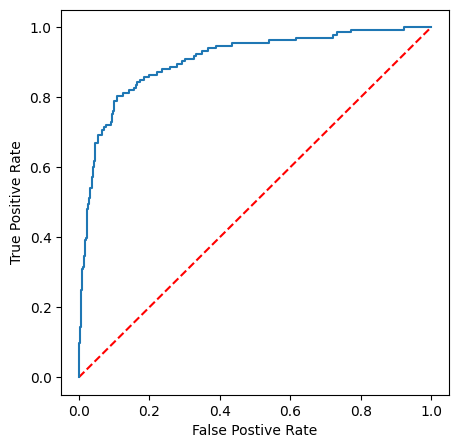

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fitted_churn_model.summary.roc.select('FPR').collect(),
         fitted_churn_model.summary.roc.select('TPR').collect())
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [80]:
auc

0.9257977700884275

In [81]:
final_logreg_model = logreg_churn.fit(final_df)

In [104]:
new_customers = spark.read.csv("/content/sample_data/new_customers.csv", inferSchema=True, header=True)

In [105]:
new_customers.show()

+----------------+---+--------------+---------------+-----+---------+----------------+-------------+-------+
|           Names|Age|Total_Purchase|Account_Manager|Years|Num_Sites|    Onboard_date|     Location|Company|
+----------------+---+--------------+---------------+-----+---------+----------------+-------------+-------+
|Willamson Meyers| 35|       15000.0|              0|  1.0|        8|01-05-2018 00:00|          USA|    LSG|
|    Bill Clinton| 33|      200000.0|              1|  2.0|       11|31-05-2018 00:00|          USA|    KKR|
|     Jose Butler| 38|      12884.75|              0|  1.0|       12|01-07-2017 00:00|       London|     RR|
|     Ian Chappel| 55|       90000.0|              0|  1.0|       10|04-12-2016 00:00|    Australia|     GT|
|   Kagiso Rabada| 37|        1000.0|              0| 5.56|        9|23-08-2019 00:00|South Africa |   PBKS|
|     Sam Curran | 48|      10356.02|              0| 5.12|        8|08-08-2018 00:00|       London|     MI|
| Henrick Klassen| 

In [106]:
new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: integer (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



In [107]:
test_new_customers = assembler.transform(new_customers)

In [108]:
test_new_customers.show()

+----------------+---+--------------+---------------+-----+---------+----------------+-------------+-------+--------------------+
|           Names|Age|Total_Purchase|Account_Manager|Years|Num_Sites|    Onboard_date|     Location|Company|            features|
+----------------+---+--------------+---------------+-----+---------+----------------+-------------+-------+--------------------+
|Willamson Meyers| 35|       15000.0|              0|  1.0|        8|01-05-2018 00:00|          USA|    LSG|[35.0,15000.0,0.0...|
|    Bill Clinton| 33|      200000.0|              1|  2.0|       11|31-05-2018 00:00|          USA|    KKR|[33.0,200000.0,1....|
|     Jose Butler| 38|      12884.75|              0|  1.0|       12|01-07-2017 00:00|       London|     RR|[38.0,12884.75,0....|
|     Ian Chappel| 55|       90000.0|              0|  1.0|       10|04-12-2016 00:00|    Australia|     GT|[55.0,90000.0,0.0...|
|   Kagiso Rabada| 37|        1000.0|              0| 5.56|        9|23-08-2019 00:00|Sout

In [110]:
final_new_cus_model = final_logreg_model.transform(test_new_customers)

In [139]:
final_new_cus_model.summary().show()

+-------+----------------+------------------+----------------+------------------+-----------------+-----------------+----------------+---------+-------+------------------+
|summary|           Names|               Age|  Total_Purchase|   Account_Manager|            Years|        Num_Sites|    Onboard_date| Location|Company|        prediction|
+-------+----------------+------------------+----------------+------------------+-----------------+-----------------+----------------+---------+-------+------------------+
|  count|               9|                 9|               9|                 9|                9|                9|               9|        9|      9|                 9|
|   mean|            null| 40.55555555555556|        40502.23|0.4444444444444444|3.698888888888889| 9.88888888888889|            null|     null|   null|0.3333333333333333|
| stddev|            null|7.6011695006609195|65440.1112081856|0.5270462766947299|2.399033370153719|1.452966314513558|            null|     n

In [111]:
final_new_cus_model.show()

+----------------+---+--------------+---------------+-----+---------+----------------+-------------+-------+--------------------+--------------------+--------------------+----------+
|           Names|Age|Total_Purchase|Account_Manager|Years|Num_Sites|    Onboard_date|     Location|Company|            features|       rawPrediction|         probability|prediction|
+----------------+---+--------------+---------------+-----+---------+----------------+-------------+-------+--------------------+--------------------+--------------------+----------+
|Willamson Meyers| 35|       15000.0|              0|  1.0|        8|01-05-2018 00:00|          USA|    LSG|[35.0,15000.0,0.0...|[6.43104873024888...|[0.99839182968261...|       0.0|
|    Bill Clinton| 33|      200000.0|              1|  2.0|       11|31-05-2018 00:00|          USA|    KKR|[33.0,200000.0,1....|[-5.0338848720039...|[0.00647130682582...|       1.0|
|     Jose Butler| 38|      12884.75|              0|  1.0|       12|01-07-2017 00:00

In [120]:
final_new_cus_model.select("Company", "prediction").show()

+-------+----------+
|Company|prediction|
+-------+----------+
|    LSG|       0.0|
|    KKR|       1.0|
|     RR|       0.0|
|     GT|       0.0|
|   PBKS|       0.0|
|     MI|       0.0|
|    SRH|       1.0|
|    CSK|       0.0|
|     RR|       1.0|
+-------+----------+

